<a href="https://colab.research.google.com/github/JeeshnuMaharjan/Weekly-Workshop-Python/blob/main/2408237_JeeshnuMaharjan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

		DATASET OVERVIEW:

FIRST 10 ROWS OF WORLD HAPPINESS REPORT DATASET:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                

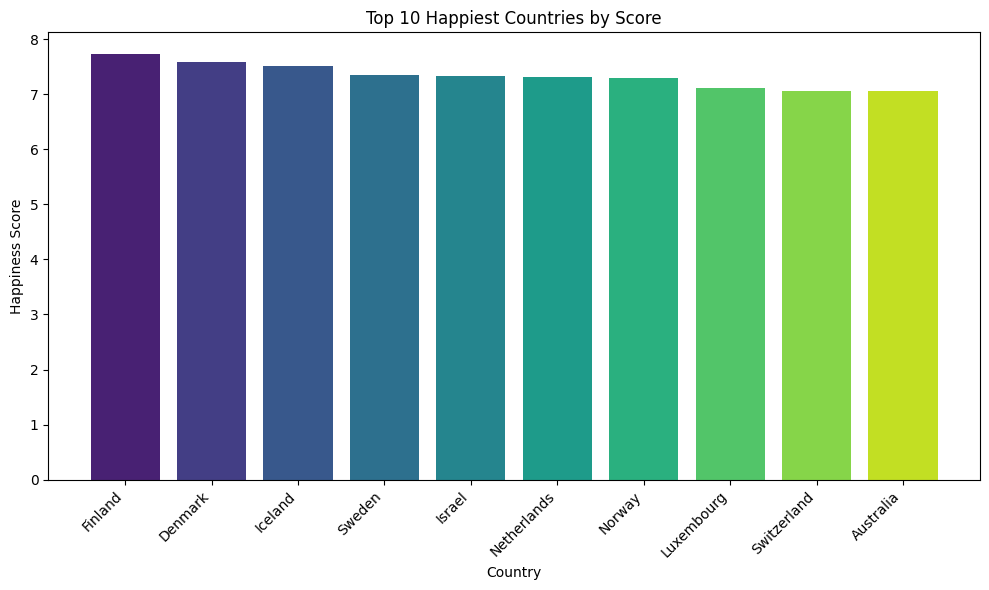

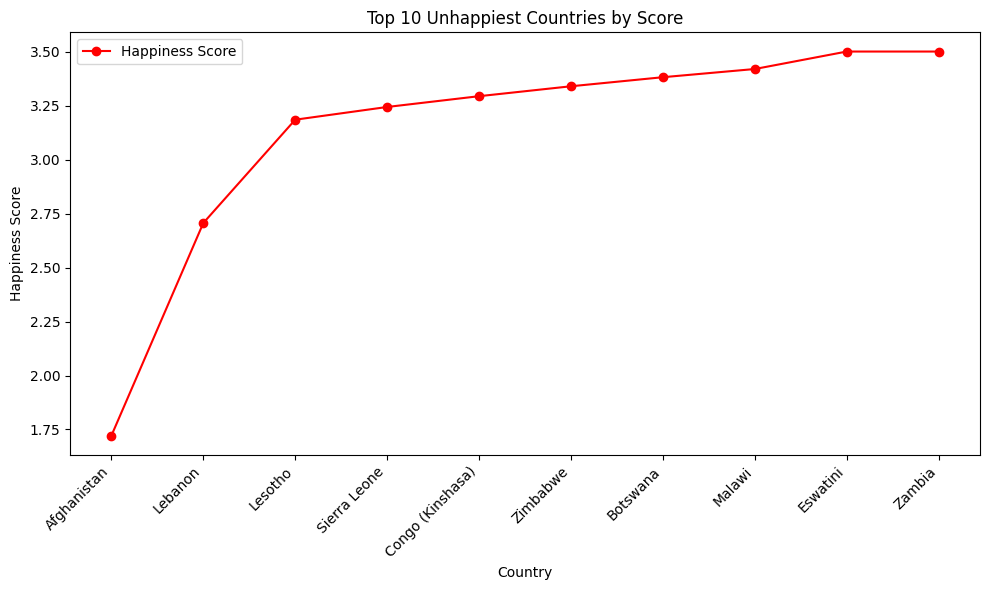

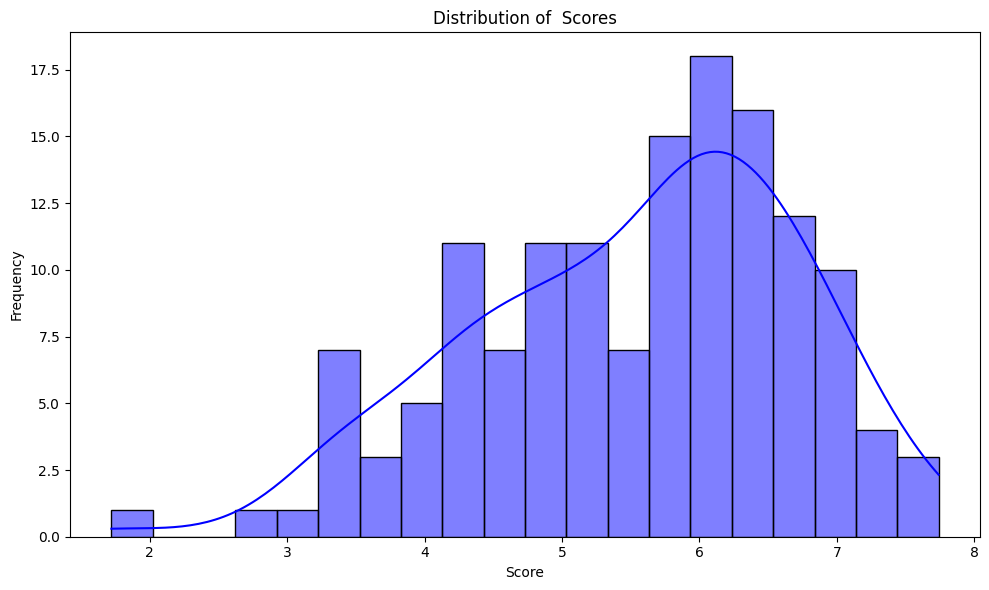

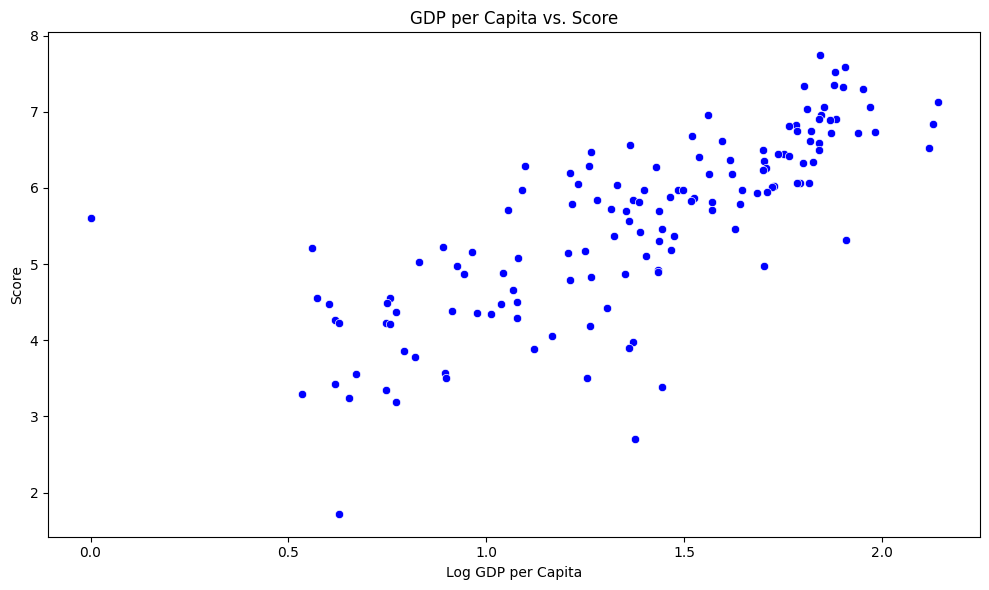

In [62]:
# CONCEPTS AND TECHNOLOGIES OF AI

# PROBLEM - 1

# 1. Data Exploration and Understanding:
#    DATASET OVERVIEW:

# Importing all the needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading, reading the data file and then displaying the first 10 rows of the dataset named 'whr_df'
print("\t\t\033[1mDATASET OVERVIEW:\033[0m\n")

whr_df = pd.read_csv('/content/drive/MyDrive/WHR-2024-5CS037.csv')
print("\033[4mFIRST 10 ROWS OF WORLD HAPPINESS REPORT DATASET:\033[0m")
print(whr_df.head(10))

# Getting the number of rows and columns from the dataframe
rows, columns = whr_df.shape
print(f"\n\033[4mTHE NUMBER OF ROWS AND COLUMNS\033[0m \nRows: \033[1m{rows}\033[0m \nColumns: \033[1m{columns}\033[0m")

# Listing all columns with their data types
print("\nCOLUMN\t\t\t\tDATATYPE")
print("----------------------------------------")
print(whr_df.dtypes,"\n")


#     BASIC STATISTIC

# Calculating the mean, median, and standard deviation for the 'score' column
mean_score = whr_df['score'].mean()
median_score = whr_df['score'].median()
std_score = whr_df['score'].std()

print("\n\t \033[1mBASIC STATISTIC\033[0m\n")
print("\033[4mThe Mean, Median and SD of 'score' column:\033[0m")
print(f"Mean = {round(mean_score, 2)}")
print(f"Median = {round(median_score, 2)}")
print(f"Standard Deviation = {round(std_score, 2)}")

# Country with the highest happiness score
highest_score_country = whr_df.loc[whr_df['score'].idxmax()]          # locating the row with the highest score through index
print("\n\033[4mCountry with the highest happiness score:\033[0m")
print(f"\033[1m{highest_score_country['Country name']}\033[0m")

# Country with the lowest happiness score
lowest_score_country = whr_df.loc[whr_df['score'].idxmin(), 'Country name']     # locating the row with the highest score through index
print("\n\033[4mCountry with the lowest happiness score:\033[0m")               # using ['Country name'] to only print country name not the whole row
print(f"\033[1m{lowest_score_country}\033[0m")
print()


#     MISSING VALUE

# Checking and displaying the total count of the missing values in the dataset
missing_values = whr_df.isnull().sum()
print("\n\t \033[1mMISSING VALUE\033[0m")
print("\nCOLUMN \t\t\t MISSING COUNT")
print("----------------------------------------")
print(missing_values)
print()


#     FILTERING AND SORTING

# Filtering the dataset for countries with a score greater than 7.5
print("\n\t \033[1mFILTERING AND SORTING\033[0m\n")
filtered_whr_df = whr_df[whr_df['score'] > 7.5]
print("\033[4mCountries with a score greater than 7.5:\033[0m")
print(filtered_whr_df[['Country name', 'score']])

# Sorting the filtered dataset by GDP per Capita in descending order
sorted_whr_df = filtered_whr_df.sort_values(by='Log GDP per capita', ascending=False)

# Displaying the top 10 rows of the sorted dataset by the means of happiness score
print("\n\033[4mTop 10 countries with the highest GDP per Capita (among those with a score > 7.5):\033[0m")
print(sorted_whr_df.head(10))
print()


#     ADDING NEW COLUMNS

# Defining a function to categorize happiness levels
print("\n\t\t\033[1mADDING NEW COLUMNS\033[0m\n")
def categorize_happiness(score):
    if score < 4:
        return "Low"
    elif 4 <= score <= 6:
        return "Medium"
    else:
        return "High"

# Applying the function to create the new column 'Happiness Category'
whr_df['Happiness Category'] = whr_df['score'].apply(categorize_happiness)

# Displaying the updated dataset with the new column
print("\033[4mDataset with the new 'Happiness Category' column:\033[0m")
print(whr_df[['Country name', 'score', 'Happiness Category']].head(10))
print()



# 2. Data Visualizations:

# a. Bar Plot: Top 10 Happiest Countries by Score
print("\n\n\t\t\t\t\t\t\t\033[1mDATA VISUALIZATION\033[0m\n")

# Selecting the top 10 happiest country using .sort_value()
top_10_happiest = whr_df.sort_values(by='score', ascending=False).head(10)

plt.figure(figsize=(10, 6))  # Setting the figure size
colors = sns.color_palette('viridis', n_colors=len(top_10_happiest))  # Use seaborn's for the graph's color palette

plt.bar(top_10_happiest['Country name'], top_10_happiest['score'], color=colors)    # Plotting the bar graph with data

# Labeling the title, x-axis and y-axis
plt.title('Top 10 Happiest Countries by Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')

# Tilting the x-label by 45 degrees
plt.xticks(rotation=45, ha='right')
plt.tight_layout() # Adjusting the layout of the graph
plt.show()  # Displaying the graph
print()


# b. Line Plot: Top 10 Unhappiest Countries by Score

# Selecting the top 10 unhappiest country using .sort_value()
top_10_unhappiest = whr_df.sort_values(by='score', ascending=True).head(10)

plt.figure(figsize=(10, 6))   # Setting the figure size
plt.plot(top_10_unhappiest['Country name'], top_10_unhappiest['score'], marker='o', color='red', label='Happiness Score')  # Plotting the bar graph with data

# Labeling the title, x-axis and y-axis
plt.title('Top 10 Unhappiest Countries by Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')

# Tilting the x-label by 45 degrees
plt.xticks(rotation=45, ha='right')
plt.legend()  # Displays legend of the graph
plt.tight_layout()  # Adjusting the layout of the graph
plt.show()  # Displaying the graph
print()


# c. Histogram: Distribution of Scores

# Interpretation of Histogram:
# The histogram shows how the scores are distributed across countries. Look for peaks, skewness, and variability.
# If the distribution is skewed, it can indicate that most countries have high scores or low scores.

plt.figure(figsize=(10, 6))
sns.histplot(whr_df['score'], bins=20, kde=True, color='blue')  # using seaborn to plot histogram

# Labeling its title and both x/y - axis
plt.title('Distribution of  Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.tight_layout()    # Ajusting its layout
plt.show()    # Displaying the graph
print()


# d. Scatter Plot: GDP per Capita vs. Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=whr_df, x='Log GDP per capita', y='score', color='blue')   # using seaborn to plot scatter graph

# Labeling the title and the axis
plt.title('GDP per Capita vs. Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Score')
plt.tight_layout() # Adjust layout
plt.show()  # Displays graph
print()


Filtered data saved to: /content/drive/MyDrive/filtered_dataframe.csv


Showing forst 5 rows form filtered data: 
    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   

     Perceptions of corruption  Dystopia + residual Happiness 

<ipython-input-61-38938330f4cf>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Composite Score'] = (


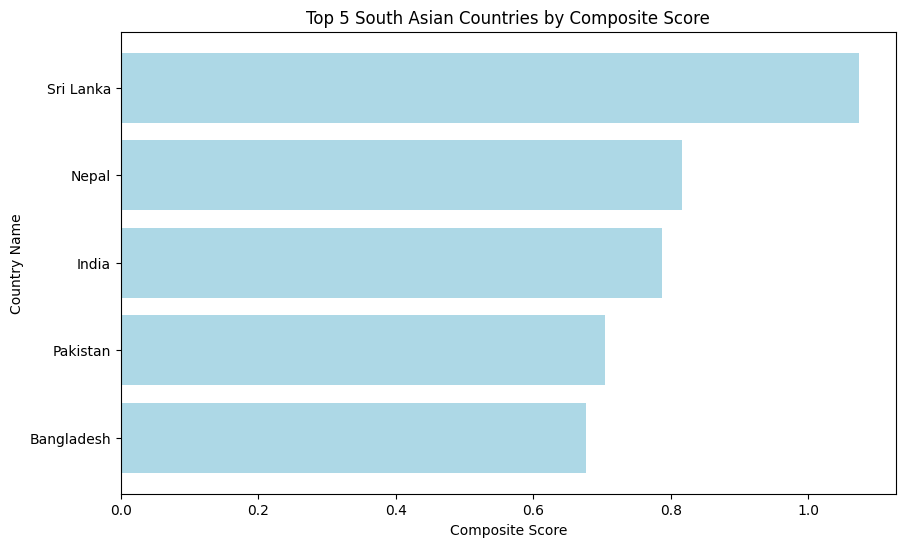

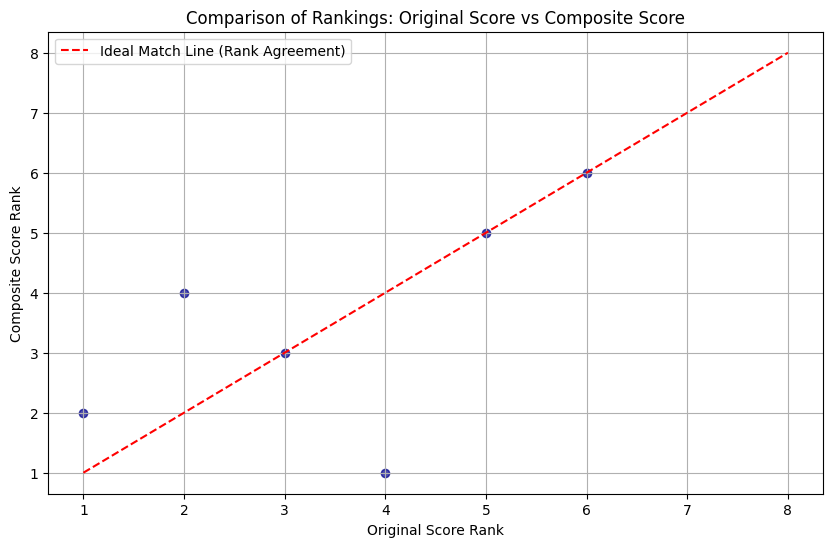


Outliers based on Score:
    Country name  score
142  Afghanistan  1.721

Outliers based on GDP per Capita:
    Country name  Log GDP per capita
142  Afghanistan               0.628



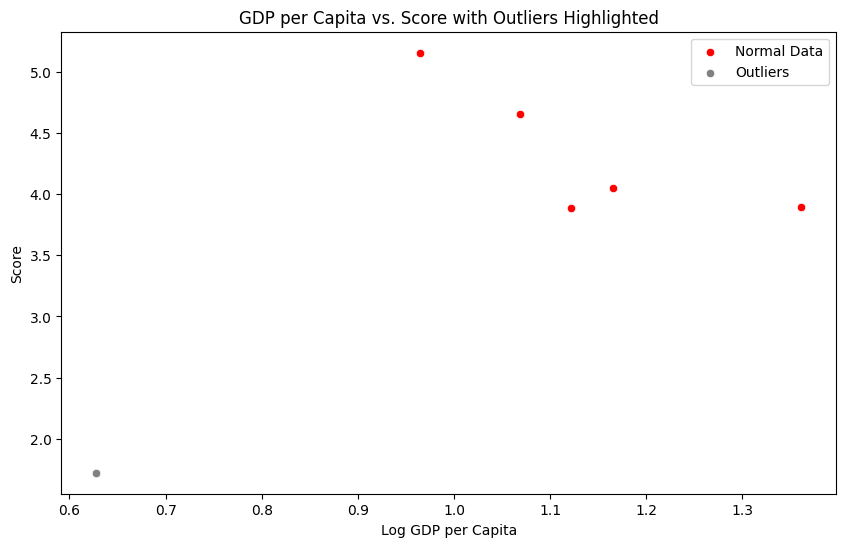


Pearson correlation between 'Freedom to Make Life Choices' and Score: 0.70
Pearson correlation between 'Generosity' and Score: 0.61



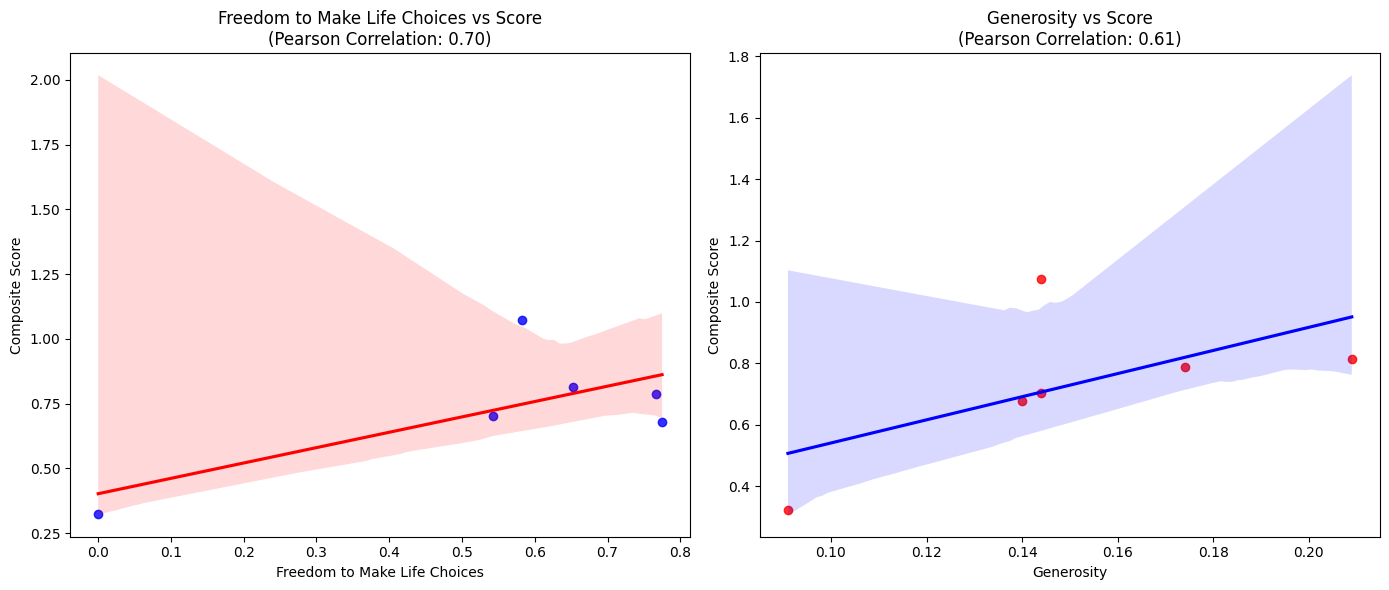


Top 3 countries with the largest positive GDP-Score Gap:
    Country name  GDP-Score Gap
128   Bangladesh         0.4446
125        India         0.3786
107     Pakistan         0.3651

Top 3 countries with the largest negative GDP-Score Gap:
    Country name  GDP-Score Gap
92         Nepal         0.1491
127    Sri Lanka         0.2871
142  Afghanistan         0.3042



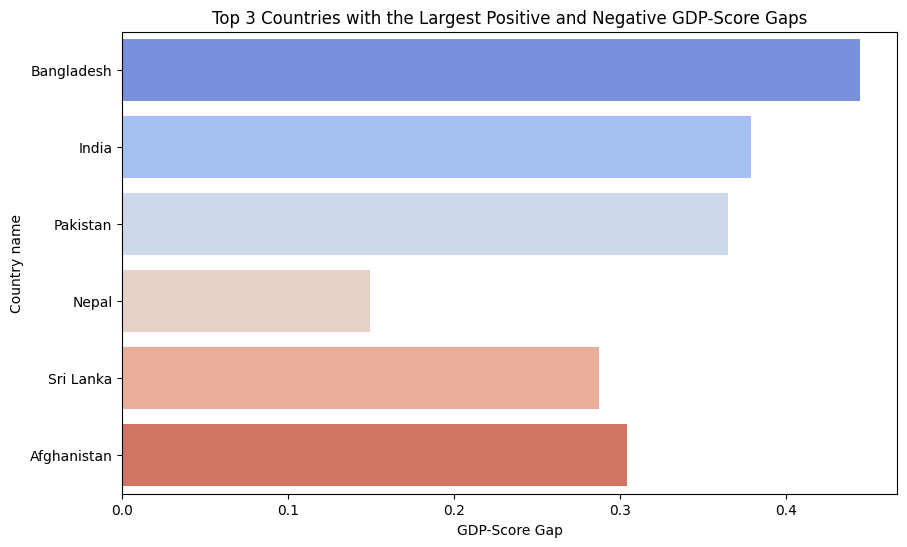

In [61]:
# PROBLEM - 2

#       TASK - 1
#       Preparing the South-Asia Dataset

# 1. Define the countries in South Asia with a list for example:

# Defining list with the given south asian country's list
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

# 2. Use the list from step - 1 to filter the dataset {i.e. filtered out matching dataset from list.}
filtered_data = filtered_data = whr_df[whr_df['Country name'].isin(south_asian_countries)]    # Filtering data using south_asian_countires list

# 3. Save the filtered dataframe as separate CSV files for future use.
filtered_file_path = '/content/drive/MyDrive/filtered_dataframe.csv'
filtered_data.to_csv(filtered_file_path, index=False)   # Saving the filtered csv file into the drive.

print(f"\033[4mFiltered data saved to: {filtered_file_path}\033[0m\n")
print("\n\033[4mShowing forst 5 rows form filtered data: \033[0m")
print(filtered_data.head(5))  # Displaying first 5 rows from the new saved csv (to check)



#       TASK - 2
#       Composite Score Ranking:

# 1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the following metrics:
# Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support + 0.30 × Healthy Life Expectancy

# Creating new column to store composite score of each country
filtered_data['Composite Score'] = (
    0.40 * filtered_data['Log GDP per capita'] +
    0.30 * filtered_data['Social support'] +
    0.30 * filtered_data['Healthy life expectancy']
)

# 2. Rank the South Asian countries based on the Composite Score in descending order.
ranked_data = filtered_data.sort_values(by="Composite Score", ascending=False)    # Sorting in descending order

# 3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.
top_5_countries = ranked_data.head(5)
print()
plt.figure(figsize=(10, 6))   # Setting figsize
plt.barh(top_5_countries['Country name'], top_5_countries['Composite Score'], color='lightblue')  # Ploting Bar graph

# Labeling both x and y axis with its main title
plt.xlabel('Composite Score')
plt.ylabel('Country Name')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.gca().invert_yaxis()  # Reverse the order to show the highest score at the top
plt.show()  # Displaying the graph
print()

# 4. Discuss whether the rankings based on the Composite Score align with the original Score - support your discussion with some visualization plot.

# Composite Score vs. Original Score
# Extracting the rankings based on the original "score"
ranked_data['Original Rank'] = ranked_data['score'].rank(ascending=False)
ranked_data['Composite Rank'] = ranked_data['Composite Score'].rank(ascending=False)

# Plotting a scatter plot to visualize the relationship between original score and composite score ranks
plt.figure(figsize=(10, 6))
plt.scatter(ranked_data['Original Rank'], ranked_data['Composite Rank'], color='darkblue', alpha=0.7)
plt.plot([1, 8], [1, 8], '--', color='red', label='Ideal Match Line (Rank Agreement)')  # Reference line

# labeling main title, x and y axis
plt.xlabel('Original Score Rank')
plt.ylabel('Composite Score Rank')
plt.title('Comparison of Rankings: Original Score vs Composite Score')
plt.legend()
plt.grid()
plt.show()    # Display graph

# Display ranked_data (to check)
ranked_data[['Country name', 'Original Rank', 'Composite Rank']]



#       TASK - 3
#       Outlier Detection:

# 1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
import numpy as np

# Finding outliner for Score
Q1_score = filtered_data['score'].quantile(0.25)
Q3_score = filtered_data['score'].quantile(0.75)
IQR_score = Q3_score - Q1_score
lower_bound_score = Q1_score - 1.5 * IQR_score
upper_bound_score = Q3_score + 1.5 * IQR_score

# Finding outliner GDP per Capita
Q1_gdp = filtered_data['Log GDP per capita'].quantile(0.25)
Q3_gdp = filtered_data['Log GDP per capita'].quantile(0.75)
IQR_gdp = Q3_gdp - Q1_gdp
lower_bound_gdp = Q1_gdp - 1.5 * IQR_gdp
upper_bound_gdp = Q3_gdp + 1.5 * IQR_gdp

# Identifying the outliers countries based on the Score and GDP per Capita
outliers_score = filtered_data[(filtered_data['score'] < lower_bound_score) | (filtered_data['score'] > upper_bound_score)]
outliers_gdp = filtered_data[(filtered_data['Log GDP per capita'] < lower_bound_gdp) | (filtered_data['Log GDP per capita'] > upper_bound_gdp)]

# Displayig them
print("\n\033[4mOutliers based on Score:\033[0m")
print(outliers_score[['Country name', 'score']])

print("\n\033[4mOutliers based on GDP per Capita:\033[0m")
print(outliers_gdp[['Country name', 'Log GDP per capita']])
print()

# 2. Defining the outliers using the 1.5 × IQR rule.
outliers = filtered_data[
    (filtered_data['score'] < lower_bound_score) | (filtered_data['score'] > upper_bound_score) |
    (filtered_data['Log GDP per capita'] < lower_bound_gdp) | (filtered_data['Log GDP per capita'] > upper_bound_gdp)
]

# 3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers in a different color.
plt.figure(figsize=(10, 6))

# Ploting scattered main data points in red
sns.scatterplot(x=filtered_data['Log GDP per capita'], y=filtered_data['score'], label='Normal Data', color='red')
# Plotting scattered outliers in grey
sns.scatterplot(x=outliers['Log GDP per capita'], y=outliers['score'], label='Outliers', color='grey')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Score')
plt.title('GDP per Capita vs. Score with Outliers Highlighted')
plt.legend()
plt.show()
print()

# 4. Discuss the characteristics of these outliers and their potential impact on regional averages.


#       TASK - 4
#       Exploring Trends Across Metrics:

# 1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation {pearson correlation} with the Score for South Asian countries.

# Calculating the correlation
freedom_corr = ranked_data['Freedom to make life choices'].corr(ranked_data['Composite Score'])
generosity_corr = ranked_data['Generosity'].corr(ranked_data['Composite Score'])

# Output of the correlations
print(f"\033[4mPearson correlation between 'Freedom to Make Life Choices' and Score:\033[0m {freedom_corr:.2f}")
print(f"\033[4mPearson correlation between 'Generosity' and Score:\033[0m {generosity_corr:.2f}\n")


# 2. Create scatter plots with trendlines for these metrics against the Score.
plt.figure(figsize=(14, 6))

# Freedom to Make Life Choices vs Score
plt.subplot(1, 2, 1)
sns.regplot(
    x=ranked_data['Freedom to make life choices'],
    y=ranked_data['Composite Score'],
    scatter_kws={'color': 'blue'}, line_kws={'color': 'red'}
)
plt.title(f'Freedom to Make Life Choices vs Score\n(Pearson Correlation: {freedom_corr:.2f})')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Composite Score')

# Generosity vs Score
plt.subplot(1, 2, 2)
sns.regplot(
    x=ranked_data['Generosity'],
    y=ranked_data['Composite Score'],
    scatter_kws={'color': 'red'}, line_kws={'color': 'blue'}
)
plt.title(f'Generosity vs Score\n(Pearson Correlation: {generosity_corr:.2f})')
plt.xlabel('Generosity')
plt.ylabel('Composite Score')
plt.tight_layout()
plt.show()


# 3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for South Asian countries.
# freedom_corr, generosity_corr


#       TASK - 5
#       Gap Analysis:

# 1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score for each South Asian country.

# Creating new column for the difference between GDP per capitta and score
ranked_data['GDP-Score Gap'] = ranked_data['Log GDP per capita'] - ranked_data['Composite Score']


# 2. Ranking the South Asian countries by this gap in both ascending and descending order.
gap_ranked_ascending = ranked_data.sort_values(by='GDP-Score Gap', ascending=True)
gap_ranked_descending = ranked_data.sort_values(by='GDP-Score Gap', ascending=False)

# Displays the top 3 countries with the largest positive and negative GDP-Score gaps
top_positive_gap = gap_ranked_descending[['Country name', 'GDP-Score Gap']].head(3)
top_negative_gap = gap_ranked_ascending[['Country name', 'GDP-Score Gap']].head(3)

# Prints out the top positive and negative gaps
print("\n\033[4mTop 3 countries with the largest positive GDP-Score Gap:\033[0m")
print(top_positive_gap)
print("\n\033[4mTop 3 countries with the largest negative GDP-Score Gap:\033[0m")
print(top_negative_gap)
print()

# 3. Highlighting the top 3 countries with the largest positive and negative gaps using a bar chart.
# Combines the top positive and negative gaps into one DataFrame for plotting
top_gaps = pd.concat([top_positive_gap, top_negative_gap])

# Plots the bar chart which well labeled title and axis
plt.figure(figsize=(10, 6))
sns.barplot(x='GDP-Score Gap', y='Country name', hue='Country name', data=top_gaps, palette='coolwarm', legend=False)
plt.title('Top 3 Countries with the Largest Positive and Negative GDP-Score Gaps')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country name')
plt.show()
print()

# 4. Analyze the reasons behind these gaps and their implications for South Asian countries.
top_positive_gap[['Country name', 'GDP-Score Gap']]
top_negative_gap[['Country name', 'GDP-Score Gap']]
print()


DESCRIPTIVE STATISTIC:
South Asia - Mean: 3.90, Std: 1.18
Middle East - Mean: 5.41, Std: 1.57
Region with higher average happiness score: Middle East



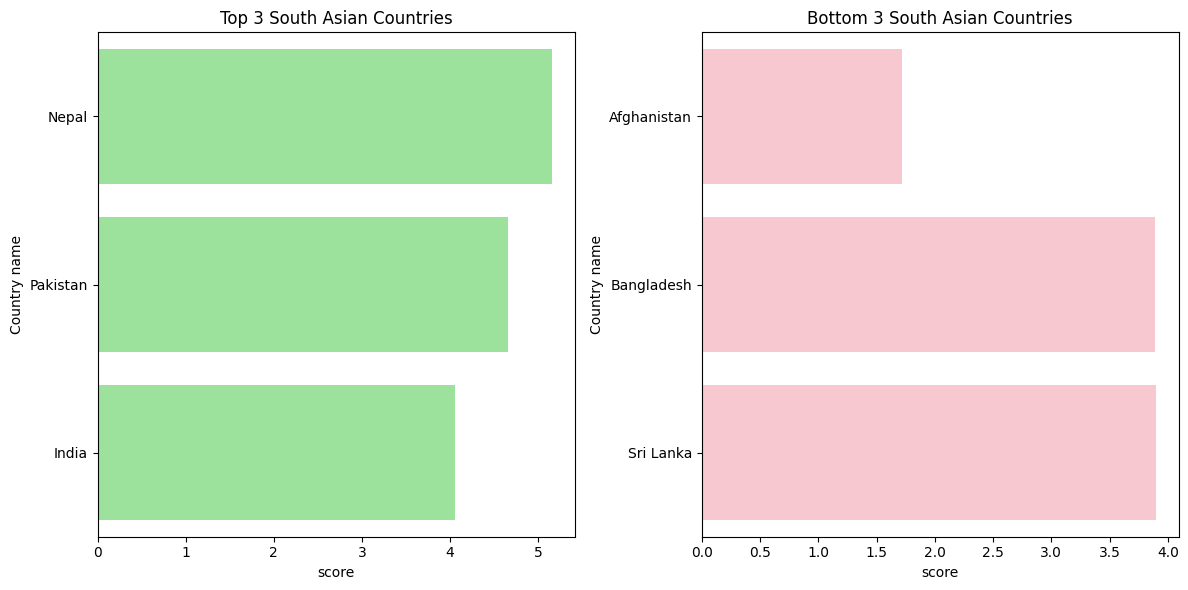

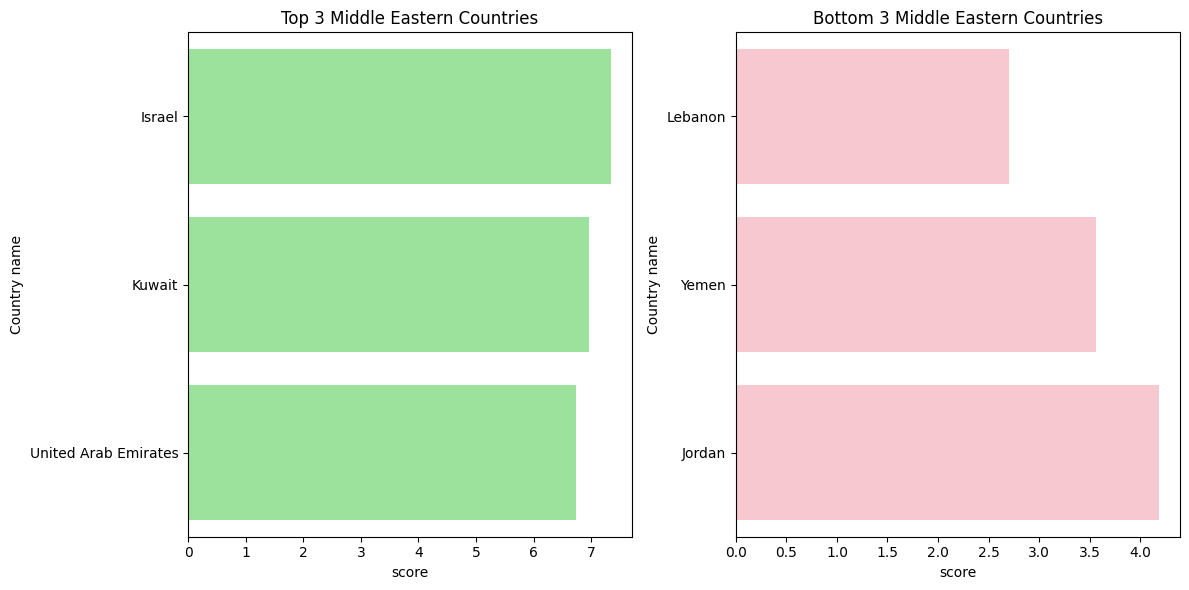

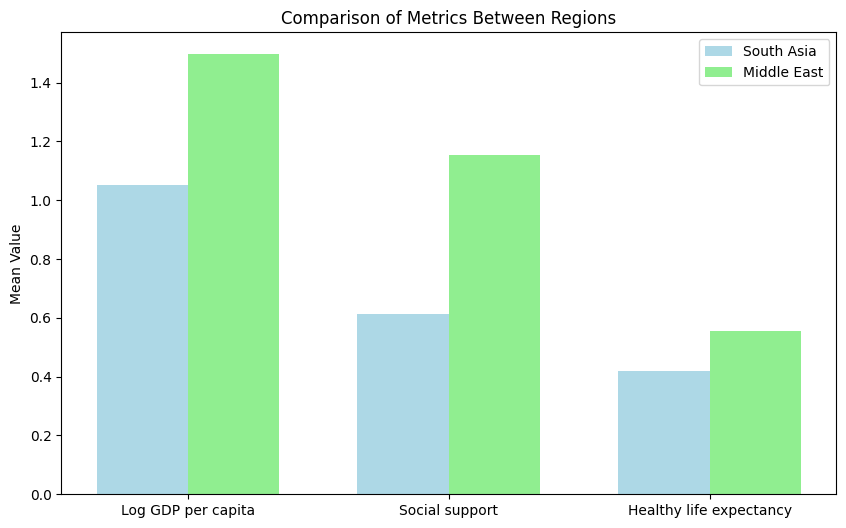


HAPPINESS DISPARITY:
South Asia - Range: 3.44, Coefficient of Variation: 0.30
Middle East - Range: 4.63, Coefficient of Variation: 0.29
Region with greater variability in happiness: South Asia

CORRELATION ANALYSIS:
South Asia:
Freedom to make life choices    0.800519
Generosity                      0.874512
score                           1.000000
Name: score, dtype: float64

Middle East:
Freedom to make life choices    0.863220
Generosity                      0.627524
score                           1.000000
Name: score, dtype: float64


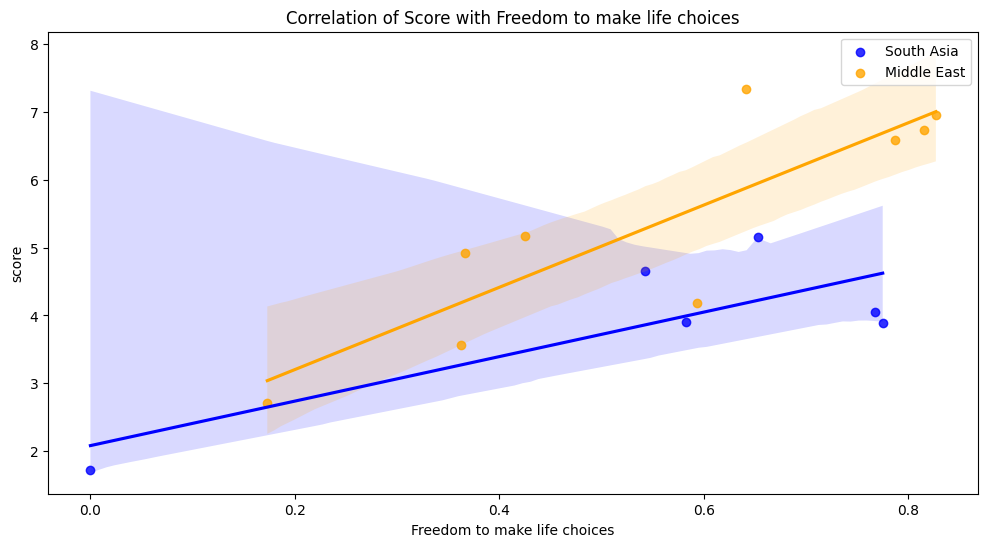

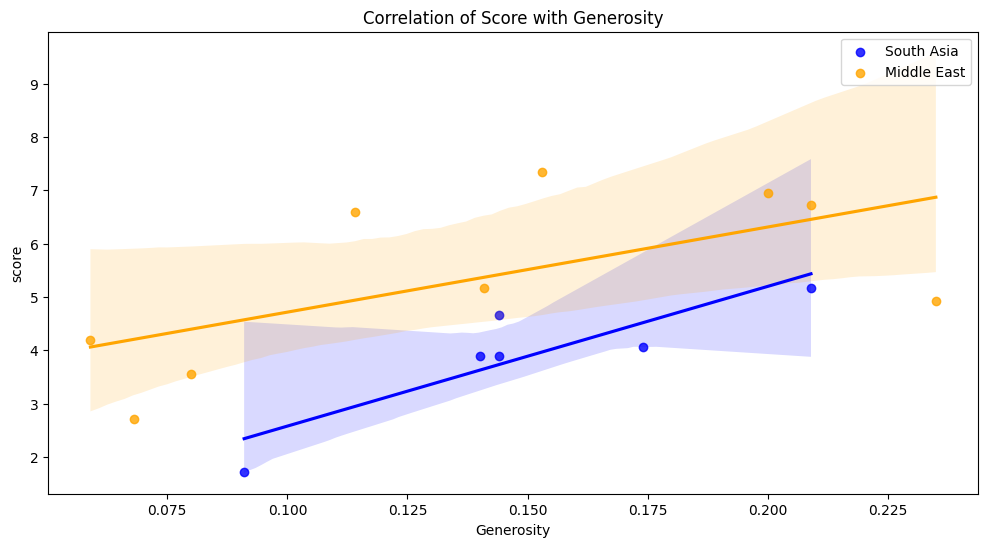


Outliers for South Asia:
    Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628

Outliers for Middle East:
Empty DataFrame
Columns: [Country name, score, Log GDP per capita]
Index: []



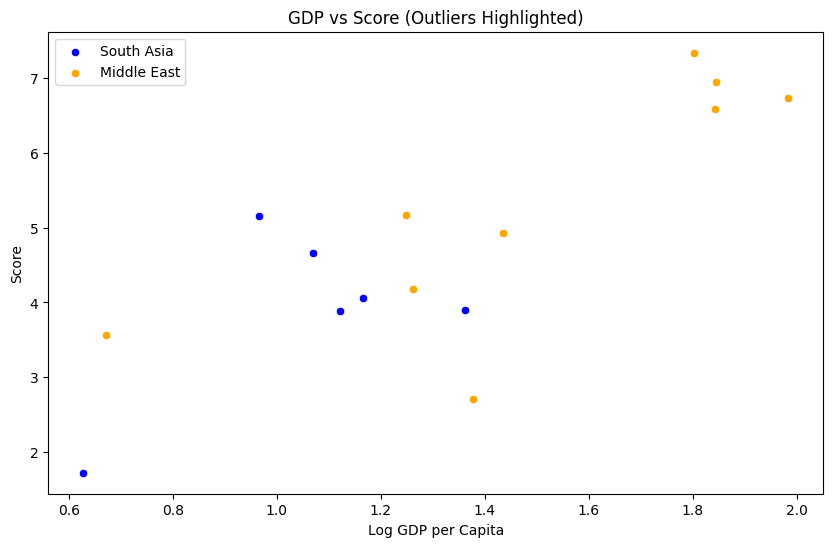

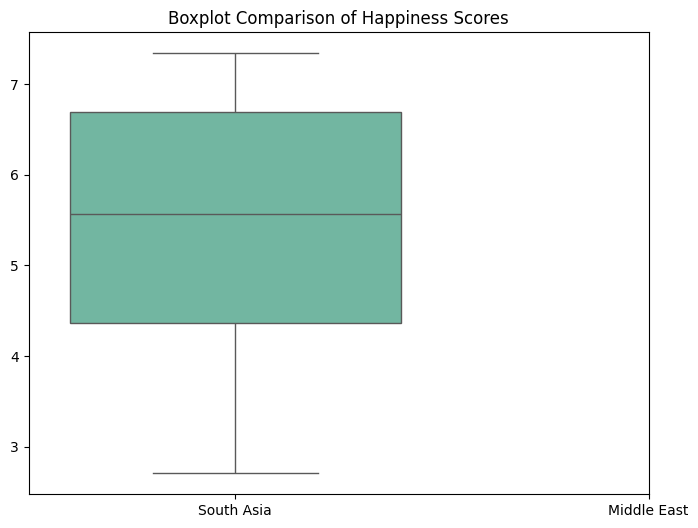

In [60]:
# PROBLEM - 3

#      TASK - 1
#      Preparing the Middle Eastern Dataset:

# 1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the following list:
# middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

# Defining the regions
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]


#       1. DESCRIPTIVE STATISTIC:

# Filters datasets
south_asia_data = whr_df[whr_df['Country name'].isin(south_asian_countries)].copy()
middle_east_data = whr_df[whr_df['Country name'].isin(middle_east_countries)].copy()


# • Calculate the mean, Standard deviation of the score for both South Asia and Middle East.
# Calculates mean and standard deviation for both regions
sa_mean, sa_std = south_asia_data['score'].mean(), south_asia_data['score'].std()
me_mean, me_std = middle_east_data['score'].mean(), middle_east_data['score'].std()


# • Which region has higher happiness Scores on average?

# Determines which region has higher average happiness
higher_region = "South Asia" if sa_mean > me_mean else "Middle East"

# Displaying the higher avg happiness
print("\033[1m\033[4mDESCRIPTIVE STATISTIC:\033[0m")
print(f"South Asia - Mean: {sa_mean:.2f}, Std: {sa_std:.2f}")
print(f"Middle East - Mean: {me_mean:.2f}, Std: {me_std:.2f}")
print(f"\033[1mRegion with higher average happiness score: {higher_region}\033[0m\n")


#       2. TOP AND BOTTOM PERFORMERS:

# • Identify the top 3 and bottom 3 countries in each region based on the score.

# Top 3 and bottom 3 countries for each region
sa_top3 = south_asia_data.nlargest(3, 'score')
sa_bottom3 = south_asia_data.nsmallest(3, 'score')
me_top3 = middle_east_data.nlargest(3, 'score')
me_bottom3 = middle_east_data.nsmallest(3, 'score')


# • Plot bar charts comparing these charts.

# Plots Top and Bottom Performers with labels
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(y=sa_top3['Country name'], x=sa_top3['score'], color='lightgreen')
plt.title("Top 3 South Asian Countries")
plt.subplot(1, 2, 2)
sns.barplot(y=sa_bottom3['Country name'], x=sa_bottom3['score'], color='pink')
plt.title("Bottom 3 South Asian Countries")
plt.tight_layout()
plt.show()
print()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(y=me_top3['Country name'], x=me_top3['score'], color='lightgreen')
plt.title("Top 3 Middle Eastern Countries")
plt.subplot(1, 2, 2)
sns.barplot(y=me_bottom3['Country name'], x=me_bottom3['score'], color='pink')
plt.title("Bottom 3 Middle Eastern Countries")
plt.tight_layout()
plt.show()
print()

#          3. MERTIC COMPARISONS:

# • Compares key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy between the regions using grouped bar charts.

metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
sa_means = south_asia_data[metrics].mean()
me_means = middle_east_data[metrics].mean()

# Plots grouped bar charts with proper labeling of title and axis
x = np.arange(len(metrics))
bar_width = 0.35
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, sa_means, bar_width, label='South Asia', color='lightblue')
plt.bar(x + bar_width/2, me_means, bar_width, label='Middle East', color='lightgreen')
plt.xticks(x, metrics)
plt.ylabel("Mean Value")
plt.title("Comparison of Metrics Between Regions")
plt.legend()
plt.show()
print()

# • Which metrics show the largest disparity between the two regions?



#         4. HAPPINESS DISPARITY:

# • Compute the range (max - min) and coefficient of variation (CV)  for Score in both regions.

# Computes the range and coefficient of variation
sa_range = south_asia_data['score'].max() - south_asia_data['score'].min()
me_range = middle_east_data['score'].max() - middle_east_data['score'].min()
sa_cv = sa_std / sa_mean
me_cv = me_std / me_mean

print("\033[1m\033[4mHAPPINESS DISPARITY:\033[0m")
print(f"South Asia - Range: {sa_range:.2f}, Coefficient of Variation: {sa_cv:.2f}")
print(f"Middle East - Range: {me_range:.2f}, Coefficient of Variation: {me_cv:.2f}")
print(f"\033[1mRegion with greater variability in happiness: {'South Asia' if sa_cv > me_cv else 'Middle East'}\033[0m\n")


# • Which region has greater variability in happiness?




#         5. CORRELATION ANALYSIS:

# • Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and Generosity within each region.

# Correlation the of Score with "Freedom to Make Life Choices" and "Generosity"
correlation_metrics = ['Freedom to make life choices', 'Generosity']
sa_correlations = south_asia_data[correlation_metrics + ['score']].corr()['score']
me_correlations = middle_east_data[correlation_metrics + ['score']].corr()['score']

print("\033[1m\033[4mCORRELATION ANALYSIS:\033[0m")
print("\033[4mSouth Asia:\033[0m")
print(sa_correlations)
print("\n\033[4mMiddle East:\033[0m")
print(me_correlations)


# • Create scatter plots to visualize and interpret the relationships.

# Scatter plots with trendlines using seaborn and for loop (to make graph for both regions)
for metric in correlation_metrics:
    plt.figure(figsize=(12, 6))
    sns.regplot(data=south_asia_data, x=metric, y='score', label='South Asia', color='blue')
    sns.regplot(data=middle_east_data, x=metric, y='score', label='Middle East', color='orange')
    plt.title(f"Correlation of Score with {metric}")
    plt.legend()
    plt.show()
    print()


#         6. OUTLINER DETECTION:

# • Identify outlier countries in both regions based on Score and GDP per Capita.

# Defines outliers using 1.5 * IQR rule
for region_data, region_name in [(south_asia_data, "South Asia"), (middle_east_data, "Middle East")]:
    q1 = region_data['score'].quantile(0.25)
    q3 = region_data['score'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = region_data[(region_data['score'] < lower_bound) | (region_data['score'] > upper_bound)]

    print(f"\033[1m\033[4mOutliers for {region_name}:\033[0m")
    print(outliers[['Country name', 'score', 'Log GDP per capita']])
    print()


# • Plot these outliers and discuss their implications.

# Scatter plot highlighting outliers using seaborn with proper labels
plt.figure(figsize=(10, 6))
sns.scatterplot(data=south_asia_data, x='Log GDP per capita', y='score', label='South Asia', color='blue')
sns.scatterplot(data=middle_east_data, x='Log GDP per capita', y='score', label='Middle East', color='orange')
plt.title("GDP vs Score (Outliers Highlighted)")
plt.xlabel("Log GDP per Capita")
plt.ylabel("Score")
plt.legend()
plt.show()
print()

#         7. VISUALIZATION:

# • Create boxplots comparing the distribution of Score between South Asia and the Middle East.

plt.figure(figsize=(8, 6))
sns.boxplot(data=[south_asia_data['score'], middle_east_data['score']], palette='Set2')
plt.xticks([0, 1], ["South Asia", "Middle East"])
plt.title("Boxplot Comparison of Happiness Scores")
plt.show()
